In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
df = pd.read_excel("GPU Sharing Data Collection.xlsx")

In [4]:
df.columns

Index(['ID', 'Model', 'Dataset', 'Epoch', 'Batch Size', 'Runtime Environment',
       'CPU Utilization percent range', 'Max. CPU Utilization percent',
       'Min. CPU Utilization percent', 'GPU Utilization percent range',
       'Max. GPU Utilization percent', 'Min. GPU Utilization percent',
       'System Memory Utilization percent range',
       'Max. System Memory Utilization percent ',
       'Min. System Memory Utilization percent ',
       'Max. Process Memory in Use (non swap) ',
       'Process Memory in Use (non swap) percent', 'CPU Threads',
       'GPU Temp. range', 'Max. GPU Temp.', 'Min. GPU Temp',
       'GPU Time spent accessing memory percent range',
       'Max. GPU Time spent accessing memory percent ',
       'Min. GPU Time spent accessing memory percent ',
       'Max. GPU Memory Allocated percent', 'GPU Power Usage percent range',
       'Max. GPU Power Usage percent', 'Min. GPU Power Usage percent',
       'System CPU times_user', 'System CPU times_nice',
       

In [5]:
df

,ID,Model,Dataset,Epoch,Batch Size,Runtime Environment,CPU Utilization percent range,Max. CPU Utilization percent,Min. CPU Utilization percent,GPU Utilization percent range,...,Disk usage_free,Disk usage_percent,Network IO_bytes_sent,Network IO_bytes_received,Network IO_packets_sent,Network IO_packets_received,Network IO_errin,Network IO_errout,Network IO_dropin,Network IO_dropout
0,1,MobileNet,GTSRB,7,1024,Standard,48.23,90.15,41.92,15.80,...,136318296064,23.9,12128807,393421199,32370,36231,0,0,0,0
1,2,MobileNet,GTSRB,7,256,Standard,60.02,96.92,36.90,11.87,...,136316993536,23.9,14000820,395170543,36077,41118,0,0,0,0
2,3,MobileNet,GTSRB,6,128,Standard,44.39,87.23,42.84,7.86,...,136318107648,23.9,15310743,396535887,38715,43334,0,0,0,0
3,4,MobileNet,GTSRB,5,32,Standard,44.62,95.45,50.83,6.00,...,136318275584,23.9,23061617,404195799,53895,59955,0,0,0,0
4,5,MobileNet,GTSRB,4,2,Standard,45.63,88.33,42.70,3.83,...,136318103552,23.9,59890665,440492076,126087,133976,0,0,0,0
5,6,Nasnet_Mobile,GTSRB,7,1024,Standard,49.38,87.23,37.85,15.00,...,136308830208,23.9,11477878,397071954,28472,31824,0,0,0,0
6,7,Nasnet_Mobile,GTSRB,7,256,Standard,52.35,89.76,37.41,8.33,...,136308854784,23.9,16145091,401594271,39223,43001,0,0,0,0
7,8,Nasnet_Mobile,GTSRB,6,128,Standard,47.58,85.61,38.03,5.67,...,136308854784,23.9,16145091,401594271,39223,43001,0,0,0,0
8,9,Nasnet_Mobile,GTSRB,5,32,Standard,46.66,84.86,38.20,4.20,...,136308641792,23.9,29694357,414951974,67106,72313,0,0,0,0
9,10,Nasnet_Mobile,GTSRB,2,2,Standard,53.10,91.39,38.29,6.93,...,136308412416,23.9,88201224,473146960,179939,189070,0,0,0,0


In [6]:
!python -m pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [7]:
from Levenshtein import ratio

In [8]:
ratio(df['Model'][0], df['Model'][40])

0.2222222222222222

In [9]:
def calculate_kn_distance(df,k):

    kn_distance = []
    for i in df["Model"]:
        dist = []
        for j in df["Model"]:
            dist.append(1 - ratio(i, j))

        dist.sort()
        kn_distance.append(dist[k])

    return kn_distance


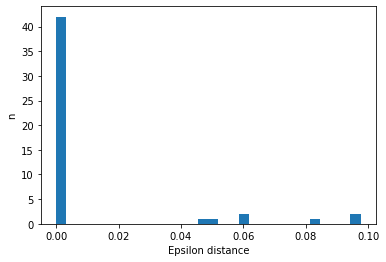

In [10]:
eps_dist = calculate_kn_distance(df,2)
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [13]:
new_x = sel.fit_transform(df.values[:,6:])

In [14]:
new_x.shape

(49, 47)

In [15]:
df.values[:,6:].shape

(49, 60)

In [16]:
new_df = df[df.columns[sel.get_support(indices=True)]]

In [17]:
new_df.shape

(49, 47)

In [18]:
new_df

,ID,Model,Dataset,Epoch,Batch Size,Runtime Environment,CPU Utilization percent range,Max. CPU Utilization percent,Min. CPU Utilization percent,GPU Utilization percent range,...,System memory usage_available,System memory usage_percent,System memory usage_used,System memory usage_free,System memory usage_inactive,System memory usage_buffers,System memory usage_shared,System memory usage_slab,Disk usage_total,Disk usage_used
0,1,MobileNet,GTSRB,7,1024,Standard,48.23,90.15,41.92,15.80,...,10443538432,23.3,5469020160,228315136,9165643776,171372544,13848576,565587968,179134558208,42799484928
1,2,MobileNet,GTSRB,7,256,Standard,60.02,96.92,36.90,11.87,...,10874757120,20.1,3513163776,1516568576,8279576576,173420544,13848576,574894080,179134558208,42800787456
2,3,MobileNet,GTSRB,6,128,Standard,44.39,87.23,42.84,7.86,...,10686988288,21.5,3523702784,1500614656,8109006848,174702592,13840384,574881792,179134558208,42799673344
3,4,MobileNet,GTSRB,5,32,Standard,44.62,95.45,50.83,6.00,...,10646429696,21.8,3301646336,1691545600,7885864960,175005696,13848576,574185472,179134558208,42799505408
4,5,MobileNet,GTSRB,4,2,Standard,45.63,88.33,42.70,3.83,...,10624286720,22.0,3250749440,1682579456,7857033216,177344512,13848576,577671168,179134558208,42799677440
5,6,Nasnet_Mobile,GTSRB,7,1024,Standard,49.38,87.23,37.85,15.00,...,10468188160,23.1,5823377408,195284992,9253298176,171347968,13848576,563322880,179134558208,42808950784
6,7,Nasnet_Mobile,GTSRB,7,256,Standard,52.35,89.76,37.41,8.33,...,10431676416,23.4,4083441664,911142912,8439189504,174825472,13848576,576851968,179134558208,42808926208
7,8,Nasnet_Mobile,GTSRB,6,128,Standard,47.58,85.61,38.03,5.67,...,10431676416,23.4,4083441664,911142912,8439189504,174825472,13848576,576851968,179134558208,42808926208
8,9,Nasnet_Mobile,GTSRB,5,32,Standard,46.66,84.86,38.20,4.20,...,10379341824,23.8,3816247296,1144102912,8168108032,175431680,13848576,577568768,179134558208,42809139200
9,10,Nasnet_Mobile,GTSRB,2,2,Standard,53.10,91.39,38.29,6.93,...,10178318336,25.3,3930861568,926994432,8173490176,181166080,13840384,580395008,179134558208,42809368576


In [19]:
difference = list(set(df.columns) - set(new_df.columns))

In [20]:
difference

['Network IO_bytes_sent',
 'System CPU times_idle',
 'System CPU times_system',
 'Network IO_errout',
 'Disk usage_percent',
 'Network IO_dropin',
 'System memory usage_cached',
 'Network IO_packets_sent',
 'Min. System Memory Utilization percent ',
 'Network IO_bytes_received',
 'Min. GPU Time spent accessing memory percent ',
 'Network IO_errin',
 'System CPU times_nice',
 'System memory usage_active',
 'Disk usage_free',
 'Network IO_packets_received',
 'Min. GPU Power Usage percent',
 'System CPU times_guest',
 'Network IO_dropout']

/tmp/ipykernel_3632914/53086176.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

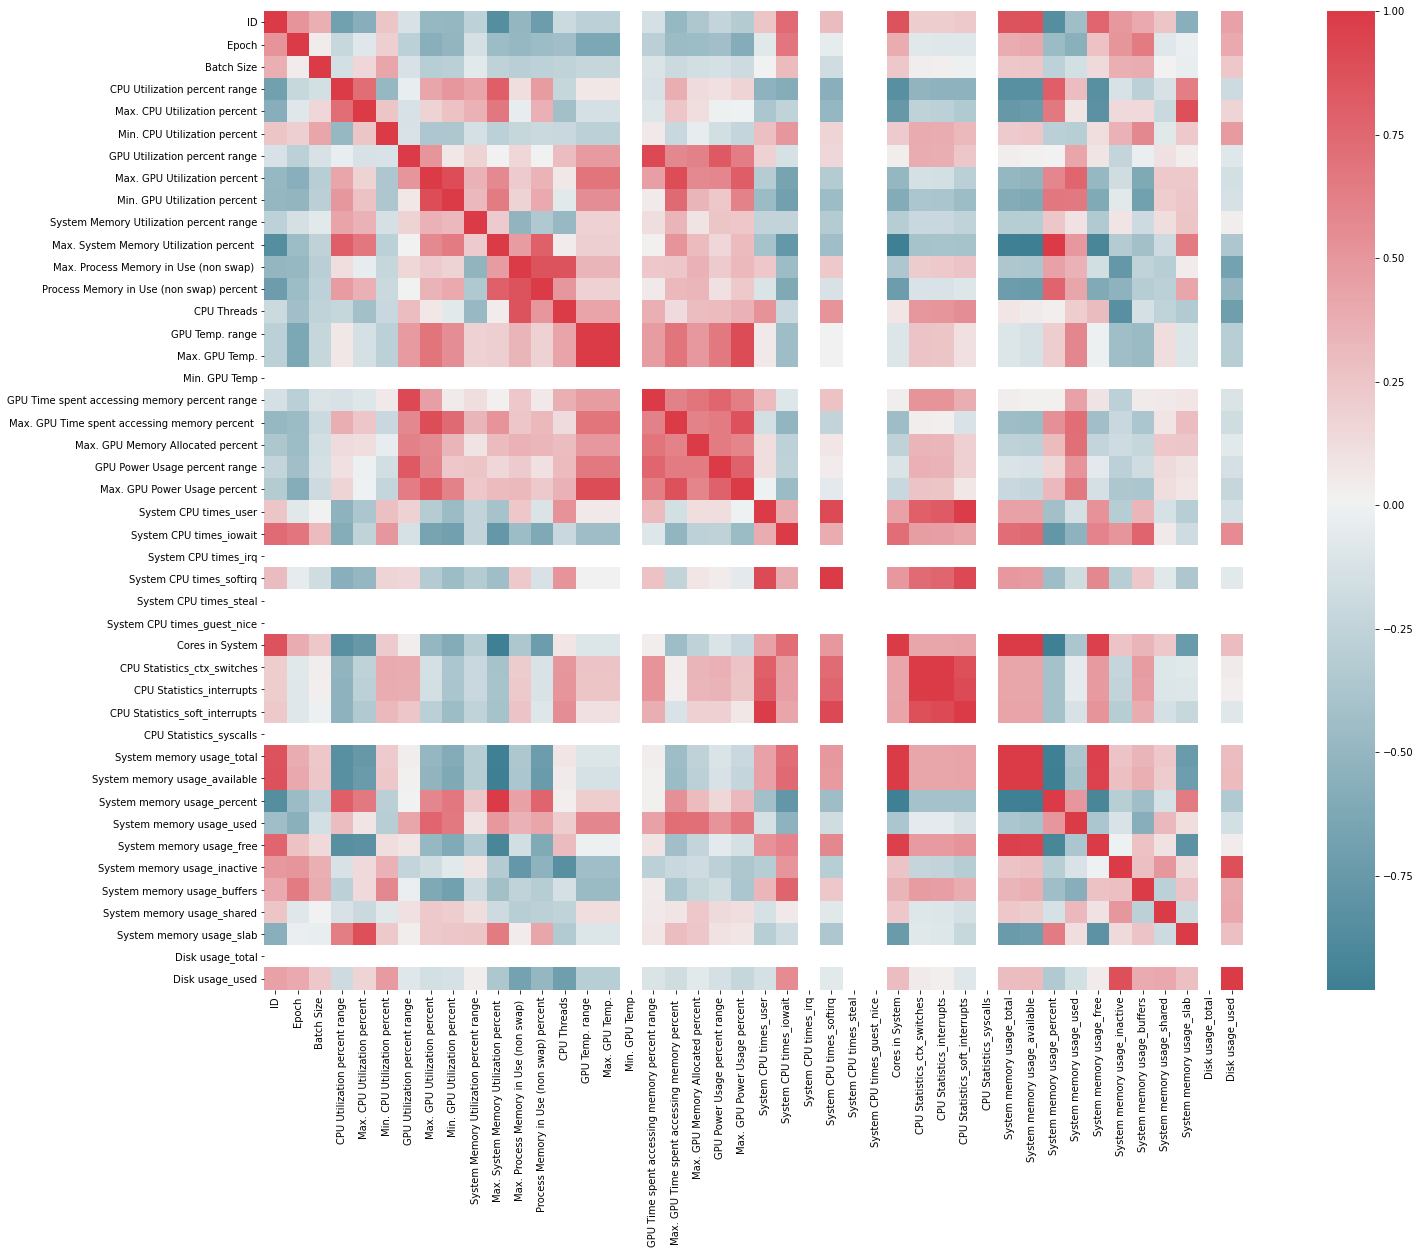

In [21]:
import seaborn as sns
import numpy as np
# import data
#my_df = pd.read_csv("feature_selection_sample_data.csv")




# run correlation matrix and plot
f, ax = plt.subplots(figsize=(30, 18))

#plt.figure(figsize=(20, 10))

corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [22]:
new_df.drop("ID", inplace=True, axis=1)

/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
new_col_names = []
for l in new_df.columns:
    new_col_names.append(l.rstrip())

In [24]:
new_df.columns = new_col_names

In [25]:
new_df.columns

Index(['Model', 'Dataset', 'Epoch', 'Batch Size', 'Runtime Environment',
       'CPU Utilization percent range', 'Max. CPU Utilization percent',
       'Min. CPU Utilization percent', 'GPU Utilization percent range',
       'Max. GPU Utilization percent', 'Min. GPU Utilization percent',
       'System Memory Utilization percent range',
       'Max. System Memory Utilization percent',
       'Max. Process Memory in Use (non swap)',
       'Process Memory in Use (non swap) percent', 'CPU Threads',
       'GPU Temp. range', 'Max. GPU Temp.', 'Min. GPU Temp',
       'GPU Time spent accessing memory percent range',
       'Max. GPU Time spent accessing memory percent',
       'Max. GPU Memory Allocated percent', 'GPU Power Usage percent range',
       'Max. GPU Power Usage percent', 'System CPU times_user',
       'System CPU times_iowait', 'System CPU times_irq',
       'System CPU times_softirq', 'System CPU times_steal',
       'System CPU times_guest_nice', 'Cores in System',
       'CP

In [26]:
corr_abs = new_df.corr().abs()

/tmp/ipykernel_3632914/1249060996.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  , dtype=np.bool),


<AxesSubplot:>

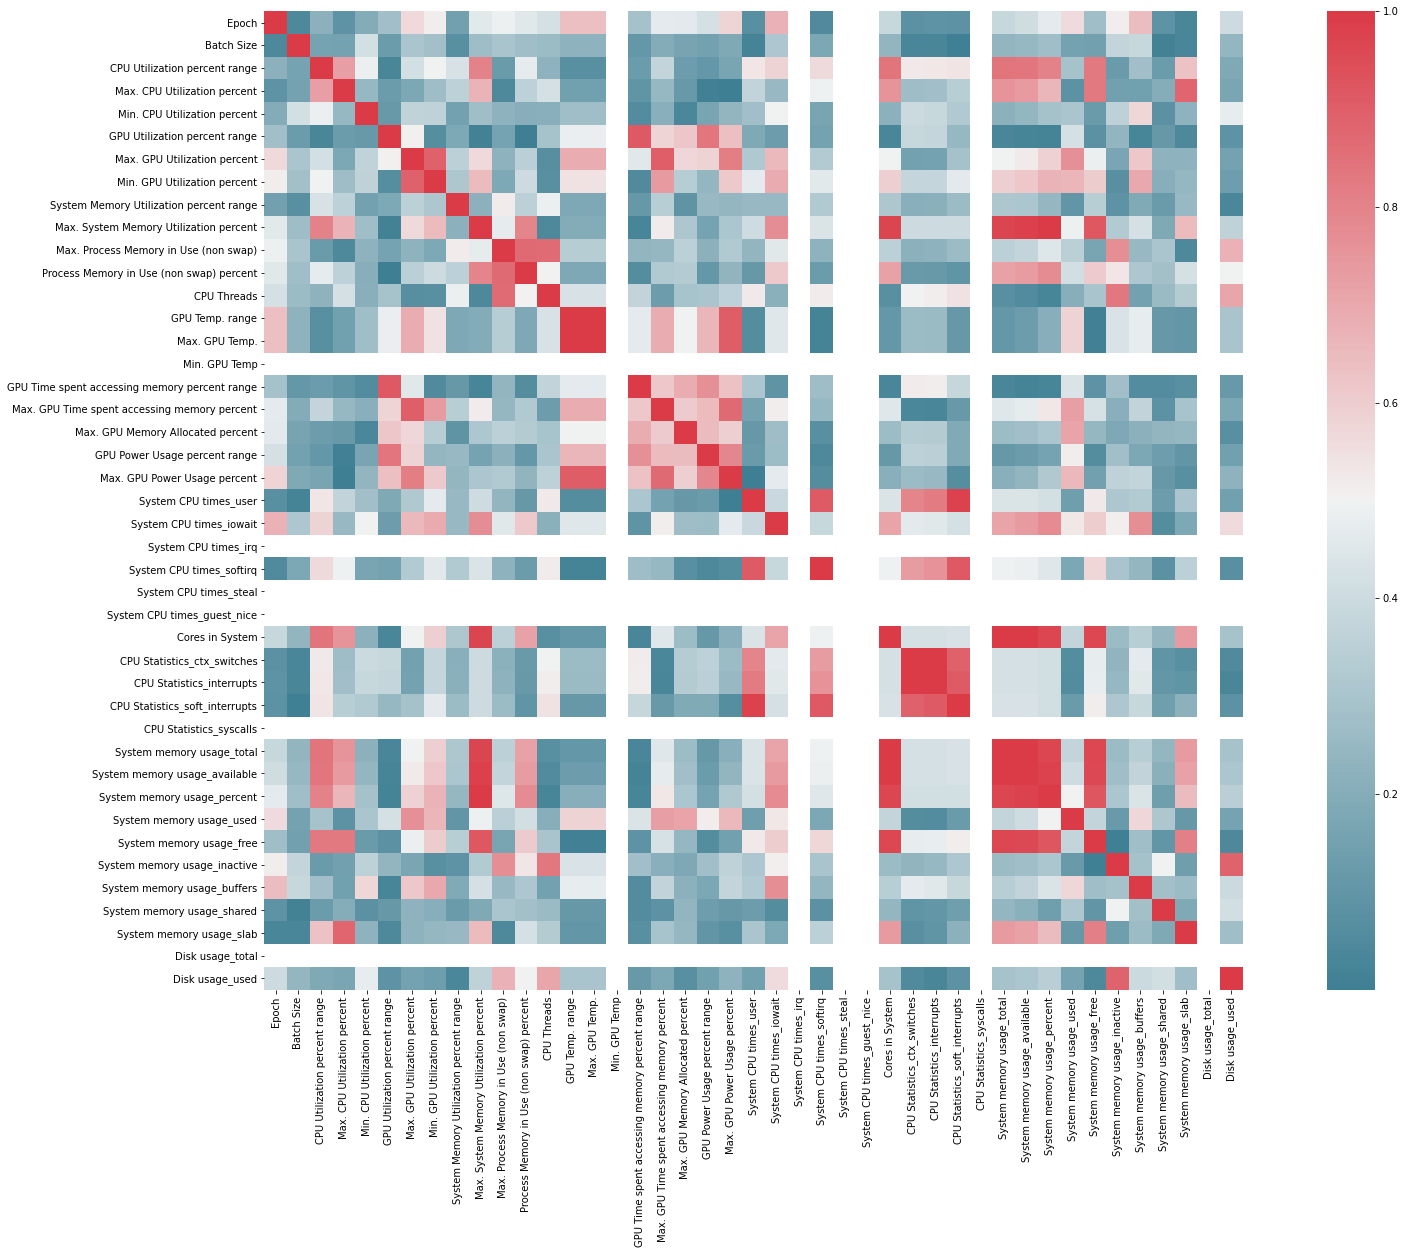

In [27]:
f, ax = plt.subplots(figsize=(30, 18))


sns.heatmap(corr_abs, mask=np.zeros_like(corr_abs
                    , dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [28]:
s = corr_abs.unstack()
so = s.sort_values(kind="quicksort")

In [29]:
s.dropna(inplace=True)

In [30]:
so = s.sort_values(kind="quicksort")

In [31]:
so_no_autocorr = so[[False if (so.index[i][0] == so.index[i][1]) else True for i in range(len(so))]] 

In [32]:
so_no_autocorr[so_no_autocorr >= 0.9]

GPU Temp. range                                Max. GPU Power Usage percent                     0.904951
Max. GPU Power Usage percent                   GPU Temp. range                                  0.904951
                                               Max. GPU Temp.                                   0.904951
Max. GPU Temp.                                 Max. GPU Power Usage percent                     0.904951
System CPU times_user                          System CPU times_softirq                         0.912114
System CPU times_softirq                       System CPU times_user                            0.912114
CPU Statistics_interrupts                      CPU Statistics_soft_interrupts                   0.913657
CPU Statistics_soft_interrupts                 CPU Statistics_interrupts                        0.913657
GPU Time spent accessing memory percent range  GPU Utilization percent range                    0.915509
GPU Utilization percent range                  GPU Time

In [33]:
so_no_autocorr.loc['Cores in System', 'Max. System Memory Utilization percent']

0.9710114968097969

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=5)

In [48]:
new_df_numerics = new_df.select_dtypes(include=[np.number])

In [49]:
pca.fit(new_df_numerics)

PCA(n_components=5)

In [198]:
new_df_numerics

,Epoch,Batch Size,CPU Utilization percent range,Max. CPU Utilization percent,Min. CPU Utilization percent,GPU Utilization percent range,Max. GPU Utilization percent,Min. GPU Utilization percent,System Memory Utilization percent range,Max. System Memory Utilization percent,...,System memory usage_available,System memory usage_percent,System memory usage_used,System memory usage_free,System memory usage_inactive,System memory usage_buffers,System memory usage_shared,System memory usage_slab,Disk usage_total,Disk usage_used
0,7,1024,48.23,90.15,41.92,15.80,46.07,30.27,0.71,24.01,...,10443538432,23.3,5469020160,228315136,9165643776,171372544,13848576,565587968,179134558208,42799484928
1,7,256,60.02,96.92,36.90,11.87,50.60,38.73,10.10,20.77,...,10874757120,20.1,3513163776,1516568576,8279576576,173420544,13848576,574894080,179134558208,42800787456
2,6,128,44.39,87.23,42.84,7.86,47.93,40.07,2.76,22.13,...,10686988288,21.5,3523702784,1500614656,8109006848,174702592,13840384,574881792,179134558208,42799673344
3,5,32,44.62,95.45,50.83,6.00,39.53,33.53,0.63,22.43,...,10646429696,21.8,3301646336,1691545600,7885864960,175005696,13848576,574185472,179134558208,42799505408
4,4,2,45.63,88.33,42.70,3.83,23.87,20.04,0.50,22.50,...,10624286720,22.0,3250749440,1682579456,7857033216,177344512,13848576,577671168,179134558208,42799677440
5,7,1024,49.38,87.23,37.85,15.00,89.20,74.20,0.69,23.79,...,10468188160,23.1,5823377408,195284992,9253298176,171347968,13848576,563322880,179134558208,42808950784
6,7,256,52.35,89.76,37.41,8.33,80.13,71.80,11.03,21.92,...,10431676416,23.4,4083441664,911142912,8439189504,174825472,13848576,576851968,179134558208,42808926208
7,6,128,47.58,85.61,38.03,5.67,75.80,70.13,0.19,23.59,...,10431676416,23.4,4083441664,911142912,8439189504,174825472,13848576,576851968,179134558208,42808926208
8,5,32,46.66,84.86,38.20,4.20,59.13,54.93,0.31,24.11,...,10379341824,23.8,3816247296,1144102912,8168108032,175431680,13848576,577568768,179134558208,42809139200
9,2,2,53.10,91.39,38.29,6.93,24.73,17.80,0.97,25.50,...,10178318336,25.3,3930861568,926994432,8173490176,181166080,13840384,580395008,179134558208,42809368576


In [50]:
pca.components_.shape

(5, 43)

In [65]:
labels = ['small_bert' if x.startswith('small_bert') else x for x in new_df["Model"]]

In [51]:
from xgboost import XGBClassifier

model = XGBClassifier()

In [249]:
model.fit(new_df_numerics_v2, labels)

/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=80,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [347]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
results = cross_val_score(model, new_df_numerics_v2, labels, cv=kfold, scoring='accuracy', verbose=10)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] START .....................................................................
[15:29:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.000) total time=   0.2s
[CV] START .....................................................................
[15:29:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.000) total time=   0.2s
[CV] START .....................................................................
[15:29:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalua

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV] END ................................ score: (test=0.300) total time=   0.2s
[CV] START .....................................................................
[15:29:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.600) total time=   0.2s
[CV] START .....................................................................
[15:29:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV] END ................................ score: (test=0.111) total time=   0.2s
Accuracy: 20.22% (22.71%)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [70]:
print(model.feature_importances_)

[0.20555873 0.         0.05637311 0.08491185 0.00432455 0.
 0.         0.00756679 0.00920504 0.01248058 0.         0.
 0.         0.00896088 0.         0.         0.0023256  0.06375157
 0.05689064 0.         0.         0.00280486 0.05638432 0.
 0.02056111 0.         0.         0.         0.1156062  0.00927344
 0.         0.         0.         0.0260273  0.         0.00565306
 0.09259495 0.         0.0134773  0.00856931 0.04545051 0.
 0.09124828]


<BarContainer object of 43 artists>

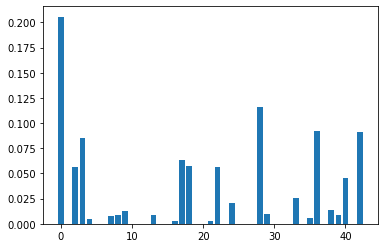

In [71]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)

In [72]:
from xgboost import plot_importance

/tmp/ipykernel_3632914/883854267.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Figures/xgboost-feat_importance-weight.pdf", type='pdf')


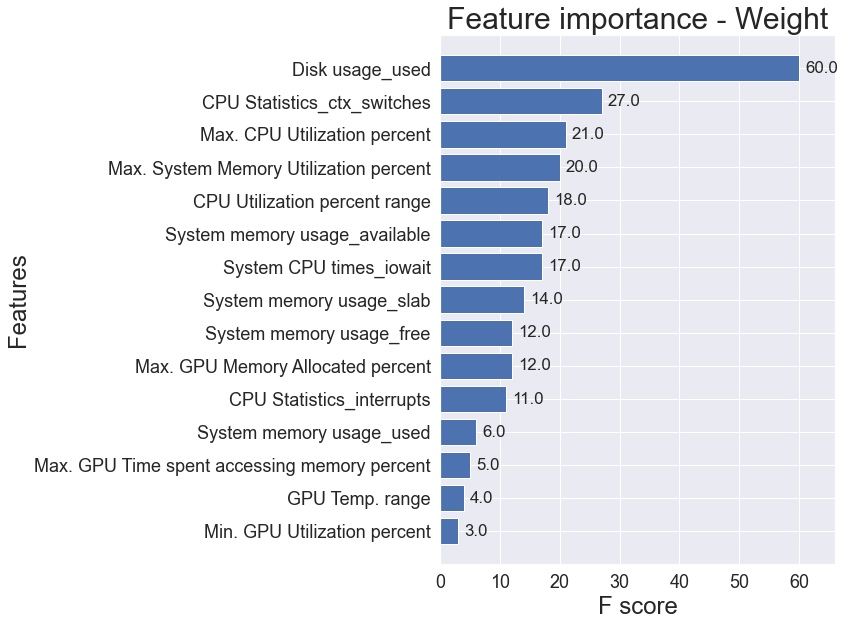

In [299]:
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(axis='both', labelsize=18)
plt.xlabel("F-score", fontsize=24)
plt.ylabel("Features", fontsize=24)

b_c = plot_importance(model, ax=ax, height=0.8, max_num_features=15)
plt.title("Feature importance - Weight", fontsize=30)
plt.tight_layout()
plt.savefig("Figures/xgboost-feat_importance-weight.pdf", type='pdf')

In [88]:
from xgboost import plot_tree

<AxesSubplot:>

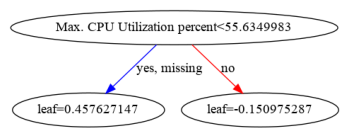

In [89]:
plot_tree(model)

/tmp/ipykernel_3632914/4202360477.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Figures/xgboost-feat_importance-gain.pdf", type='pdf')


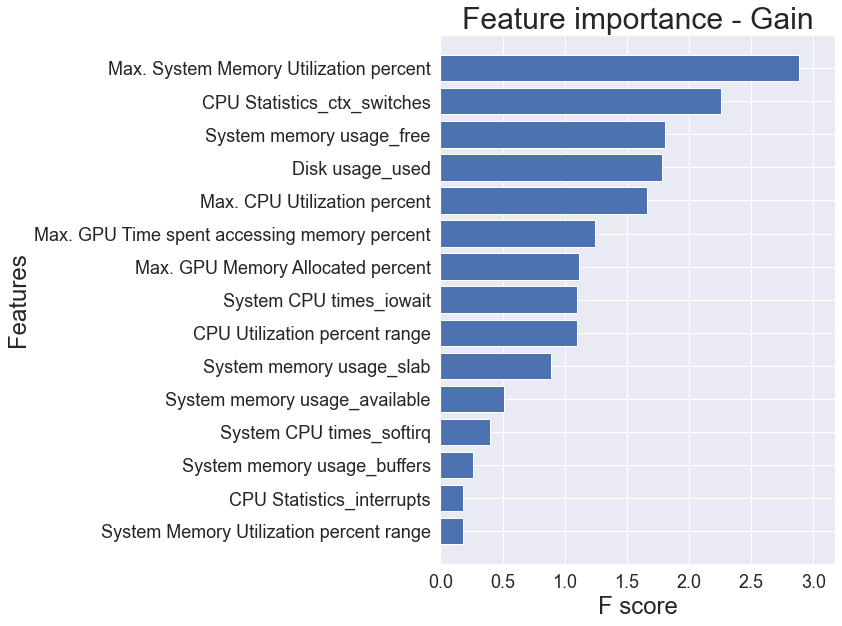

In [300]:
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(axis='both', labelsize=18)
plt.xlabel("F-score", fontsize=24)
plt.ylabel("Features", fontsize=24)

b_c = plot_importance(model, importance_type='gain', max_num_features=15, ax=ax, height=0.8, show_values=False)
plt.title("Feature importance - Gain", fontsize=30)
plt.tight_layout()
plt.savefig("Figures/xgboost-feat_importance-gain.pdf", type='pdf')

In [68]:
from sklearn.metrics import confusion_matrix

In [134]:
import copy as cp


def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array):

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [343]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list, label_encoder, outfile):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    true_labels = [label_encoder.inverse_transform([x])[0] for x in range(9)]
    
    
    plt.figure(figsize=(14,9))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, xticklabels=true_labels, yticklabels=true_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted')
    #plt.xticks(range(9), true_labels)
     #, va="center") #, ha='right')
    plt.ylabel('Actual')
    #plt.yticks(range(9), true_labels) #, ha='right', va="center")
    plt.title('Confusion Matrix')
    plt.tight_layout()
    #plt.show()
    plt.savefig(outfile)

In [152]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
y = le.transform(labels)

le.inverse_transform([1])[0]

'EfficientNet_v2'

In [345]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, predicted_proba = cross_val_predict(model, kfold, new_df_numerics_v2.values, y)

/opt/anaconda3/envs/neuralnets/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

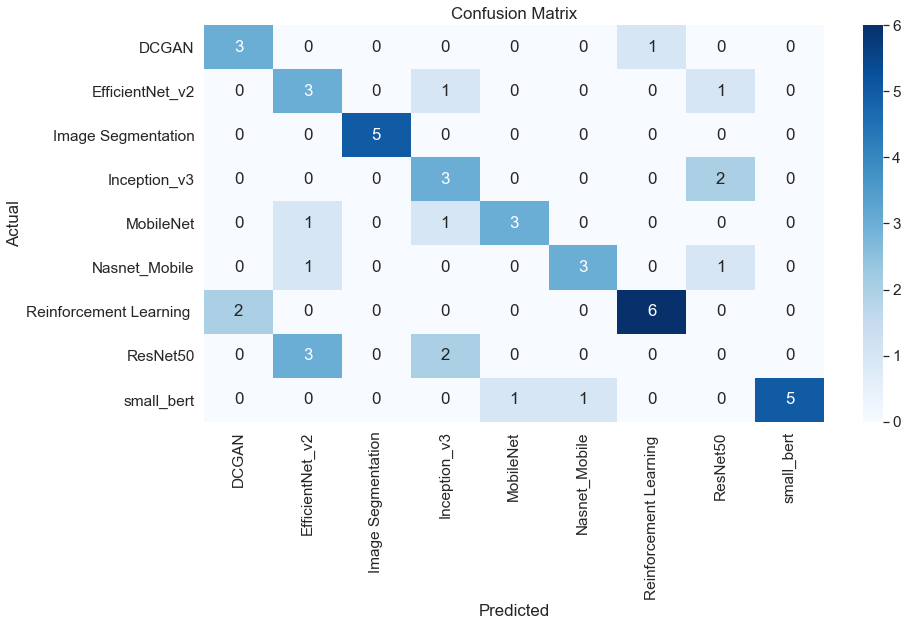

In [344]:
plot_confusion_matrix(actual_classes, predicted_classes, range(9), le, "Figures/xgboost-conf_matrix.pdf")


In [176]:
new_df['Labels'] = labels 

/tmp/ipykernel_3632914/3494545789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Labels'] = labels


/tmp/ipykernel_3632914/4213158329.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-GPU_util_max-model_classes.pdf', type="pdf")


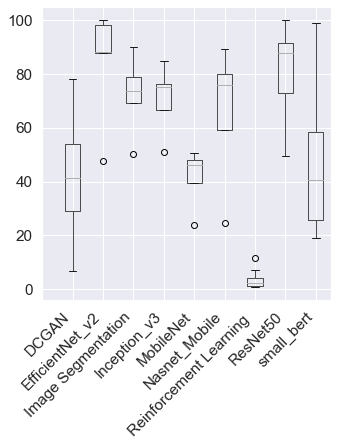

In [297]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
new_df[["Max. GPU Utilization percent", "Labels"]].pivot(columns='Labels').boxplot(rot=45)
plt.xticks(range(10), [""]+true_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-GPU_util_max-model_classes.pdf', type="pdf")

/tmp/ipykernel_3632914/1154684593.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-system_mem_usage_percent-model_classes.pdf', type="pdf")


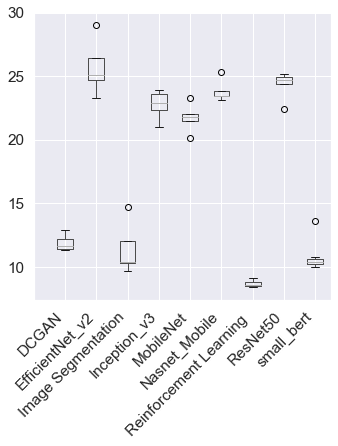

In [294]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
new_df[["System memory usage_percent", "Labels"]].pivot(columns='Labels').boxplot(rot=45)
plt.xticks(range(10), [""]+true_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-system_mem_usage_percent-model_classes.pdf', type="pdf")

/tmp/ipykernel_3632914/1154923594.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-System_CPU_times.pdf', type="pdf")


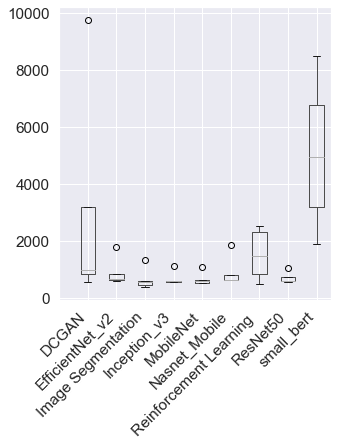

In [327]:

fig, ax = plt.subplots(figsize=(5,6.5))
true_labels = [le.inverse_transform([x])[0] for x in range(9)]
new_df[["System CPU times_user", "Labels"]].pivot(columns='Labels').boxplot(rot=45)
plt.xticks(range(10), [""]+true_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-System_CPU_times.pdf', type="pdf")

/tmp/ipykernel_3632914/3539584831.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-CPU_util_max.pdf', type="pdf")


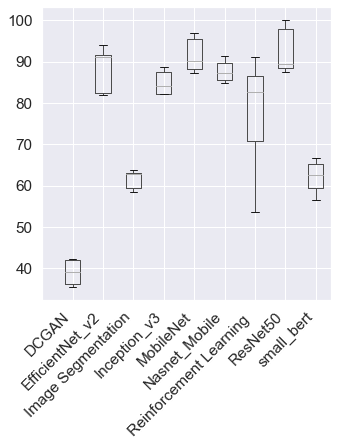

In [298]:

fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
new_df[["Max. CPU Utilization percent", "Labels"]].pivot(columns='Labels').boxplot(rot=45)
plt.xticks(range(10), [""]+true_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-CPU_util_max.pdf', type="pdf")

In [229]:
new_df_numerics_v2 = new_df_numerics.drop(["Epoch", "Batch Size"], axis=1)

In [231]:
new_df_numerics_v2.shape

(49, 41)

In [199]:
from sklearn.cluster import KMeans

In [200]:
kmeans = KMeans(n_clusters=9)

In [232]:
kmeans.fit(new_df_numerics_v2)

KMeans(n_clusters=9)

In [233]:
kmeans.labels_

array([3, 7, 7, 7, 7, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 7, 8, 2, 2, 2, 6, 6, 6, 8, 8, 8, 8, 0, 0, 0, 0, 5, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int32)

In [234]:
y

array([4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 3, 3,
       3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 2, 2, 2, 2, 2, 6, 6, 6,
       6, 6, 6, 6, 6])

In [235]:
zipped_kmeans_labels = zip(kmeans.labels_, labels)

In [236]:
kmeans_labels = []
for x in zipped_kmeans_labels:
    kmeans_labels.append(x)

In [257]:
new_df_numerics_v2.columns

Index(['CPU Utilization percent range', 'Max. CPU Utilization percent',
       'Min. CPU Utilization percent', 'GPU Utilization percent range',
       'Max. GPU Utilization percent', 'Min. GPU Utilization percent',
       'System Memory Utilization percent range',
       'Max. System Memory Utilization percent',
       'Max. Process Memory in Use (non swap)',
       'Process Memory in Use (non swap) percent', 'CPU Threads',
       'GPU Temp. range', 'Max. GPU Temp.', 'Min. GPU Temp',
       'GPU Time spent accessing memory percent range',
       'Max. GPU Time spent accessing memory percent',
       'Max. GPU Memory Allocated percent', 'GPU Power Usage percent range',
       'Max. GPU Power Usage percent', 'System CPU times_user',
       'System CPU times_iowait', 'System CPU times_irq',
       'System CPU times_softirq', 'System CPU times_steal',
       'System CPU times_guest_nice', 'Cores in System',
       'CPU Statistics_ctx_switches', 'CPU Statistics_interrupts',
       'CPU Stat

In [352]:
df_kmeans = pd.DataFrame({'kmeans_class': kmeans.labels_, 'Model': labels, "Max. GPU Utilization percent": new_df_numerics_v2["Max. GPU Utilization percent"],
                                                       "Max. CPU Utilization percent": new_df_numerics_v2["Max. CPU Utilization percent"],
                         "System memory usage_percent": new_df_numerics_v2["System memory usage_percent"], "System CPU times_user": new_df_numerics_v2["System CPU times_user"]})

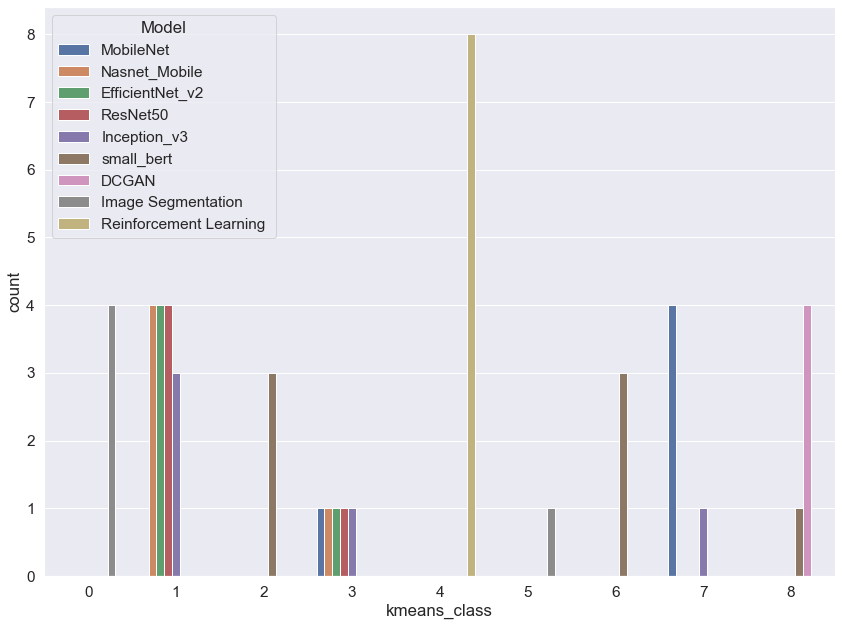

In [348]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
sns.countplot(x="kmeans_class", hue="Model", data=df_kmeans)
plt.tight_layout()
plt.savefig('Figures/kmeans-k9-countplot.pdf')

/tmp/ipykernel_3632914/3189780008.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-GPU_util_max-kmeans.pdf', type="pdf")


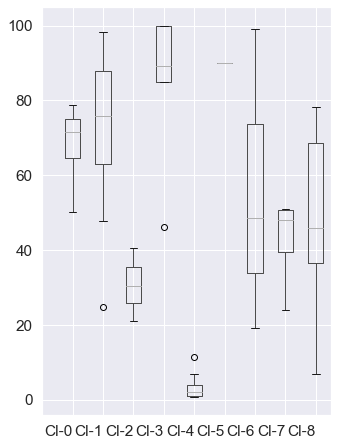

In [355]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans[["Max. GPU Utilization percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(10), [""]+["Cl-%i" % x for x in range(9)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-GPU_util_max-kmeans.pdf', type="pdf")

/tmp/ipykernel_3632914/2137062203.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-system_mem_usage_percent-kmeans.pdf', type="pdf")


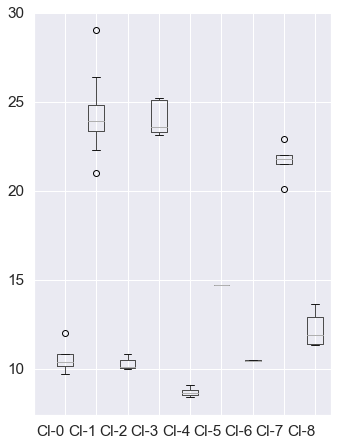

In [356]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans[["System memory usage_percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(10), [""]+["Cl-%i" % x for x in range(9)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-system_mem_usage_percent-kmeans.pdf', type="pdf")

/tmp/ipykernel_3632914/2963132349.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-CPU_util_max-kmeans.pdf', type="pdf")


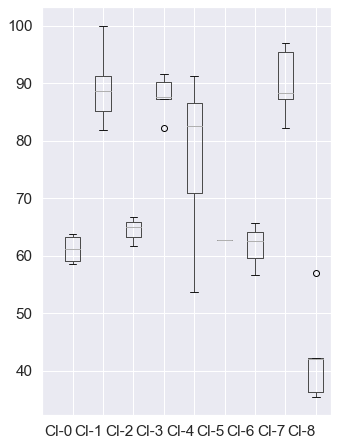

In [357]:

fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans[["Max. CPU Utilization percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(10), [""]+["Cl-%i" % x for x in range(9)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-CPU_util_max-kmeans.pdf', type="pdf")

/tmp/ipykernel_3632914/961431492.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-System_CPU_times-kmeans.pdf', type="pdf")


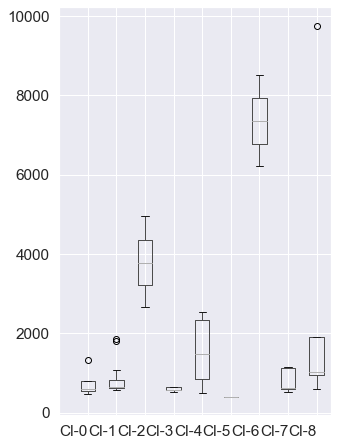

In [358]:

fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans[["System CPU times_user", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(10), [""]+["Cl-%i" % x for x in range(9)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-System_CPU_times-kmeans.pdf', type="pdf")

In [239]:
kmeans_v2 = KMeans(n_clusters=5)

In [240]:
kmeans_v2.fit(new_df_numerics_v2)

KMeans(n_clusters=5)

In [318]:
df_kmeans_v2 = pd.DataFrame({'kmeans_class': kmeans_v2.labels_, 'Model': labels, "Max. GPU Utilization percent": new_df_numerics_v2["Max. GPU Utilization percent"],
                             "Max. CPU Utilization percent": new_df_numerics_v2["Max. CPU Utilization percent"],
                         "System memory usage_percent": new_df_numerics_v2["System memory usage_percent"], "System CPU times_user": new_df_numerics_v2["System CPU times_user"]})

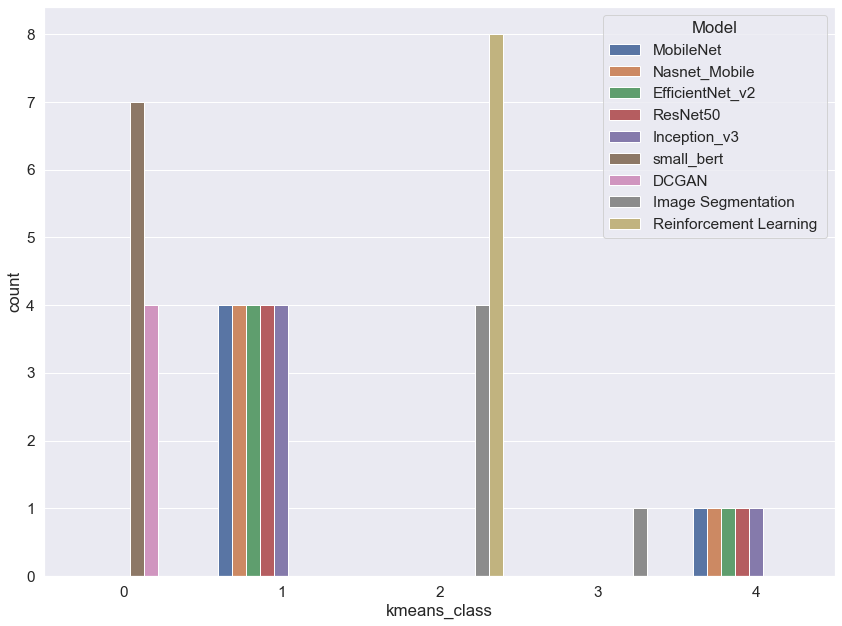

In [349]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
sns.countplot(x="kmeans_class", hue="Model", data=df_kmeans_v2)
plt.tight_layout()
plt.savefig('Figures/kmeans-k5-countplot.pdf')

/tmp/ipykernel_3632914/554252233.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-GPU_util_max-kmeansV2.pdf', type="pdf")


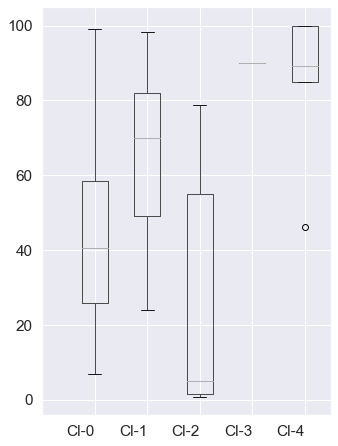

In [331]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans_v2[["Max. GPU Utilization percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(6), [""]+["Cl-%i" % x for x in range(5)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-GPU_util_max-kmeansV2.pdf', type="pdf")

/tmp/ipykernel_3632914/2348455798.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-system_mem_usage_percent-kmeansV2.pdf', type="pdf")


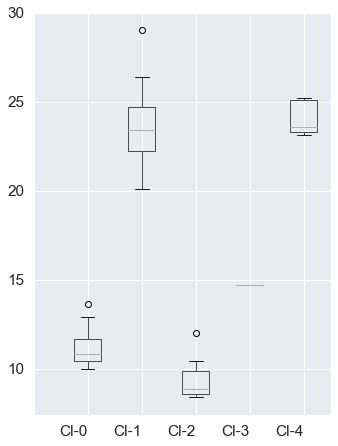

In [332]:
fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans_v2[["System memory usage_percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(6), [""]+["Cl-%i" % x for x in range(5)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-system_mem_usage_percent-kmeansV2.pdf', type="pdf")

/tmp/ipykernel_3632914/2750884277.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-CPU_util_max-kmeansV2.pdf', type="pdf")


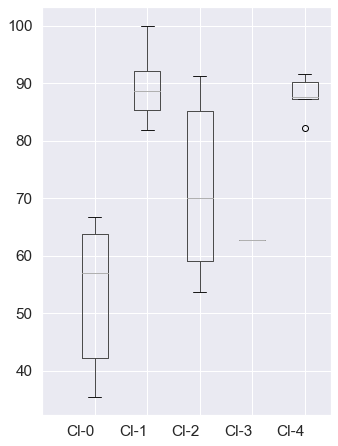

In [333]:

fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans_v2[["Max. CPU Utilization percent", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(6), [""]+["Cl-%i" % x for x in range(5)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-CPU_util_max-kmeansV2.pdf', type="pdf")

/tmp/ipykernel_3632914/4121726425.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figures/boxplot-System_CPU_times-kmeansV2.pdf', type="pdf")


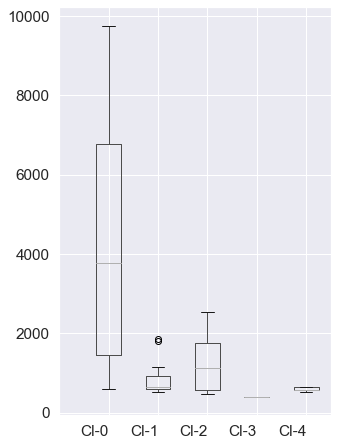

In [334]:

fig, ax = plt.subplots(figsize=(5,6.5))

true_labels = [le.inverse_transform([x])[0] for x in range(9)]
df_kmeans_v2[["System CPU times_user", "kmeans_class"]].pivot(columns='kmeans_class').boxplot()
plt.xticks(range(6), [""]+["Cl-%i" % x for x in range(5)], ha='right')
plt.tight_layout()
plt.savefig('Figures/boxplot-System_CPU_times-kmeansV2.pdf', type="pdf")

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))

true_System CPU times_userlabels = [le.inverse_transform([x])[0] for x in range(9)]
new_df[["System memory usage_percent", "Labels"]].pivot(columns='Labels').boxplot(rot=45)
plt.xticks(range(10), [""]+true_labels, rotation=45, ha='right')

In [254]:
corr_abs = new_df_numerics_v2.corr().abs()

/tmp/ipykernel_3632914/325494127.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr_abs, mask=np.zeros_like(corr_abs, dtype=np.bool),
/tmp/ipykernel_3632914/325494127.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Figures/correlation_df_numeric_v2.pdf", type='pdf')


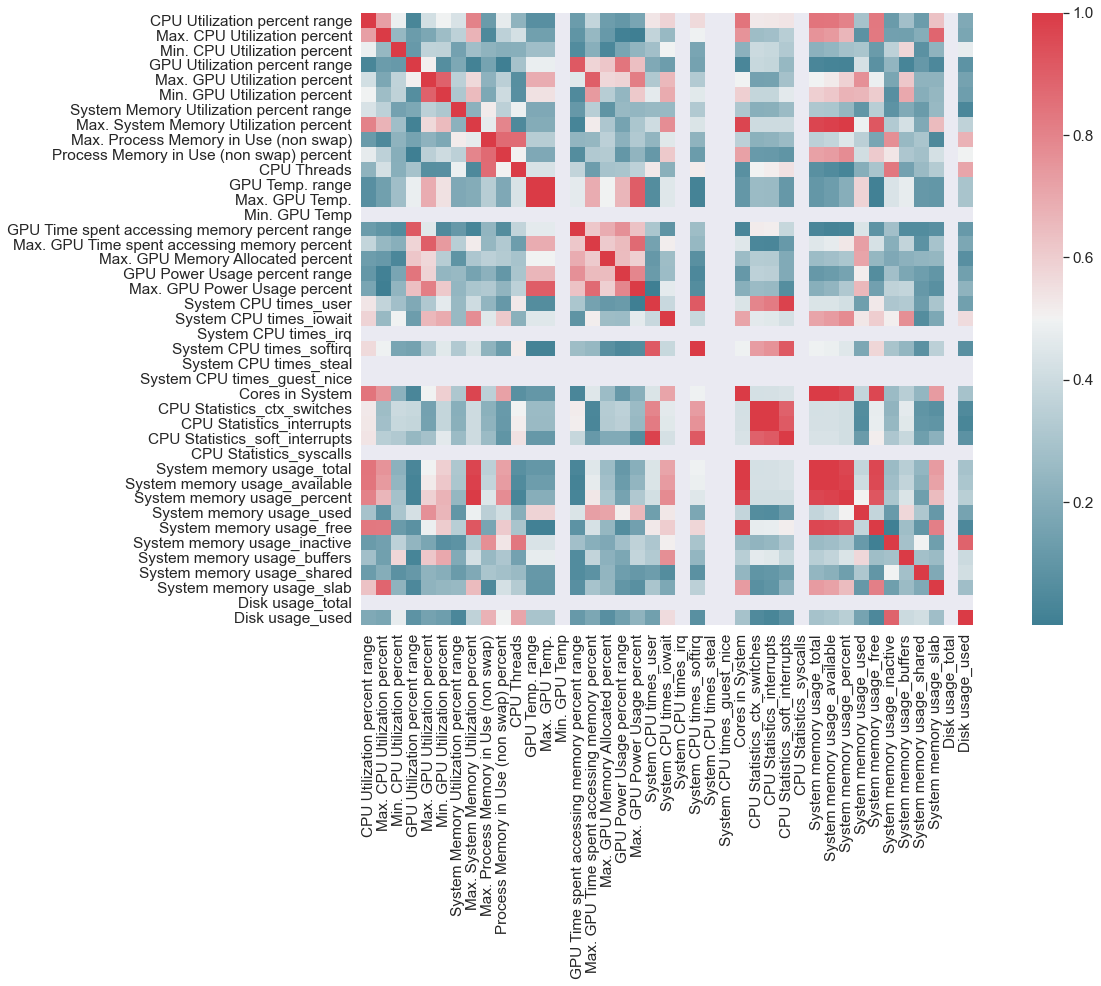

In [280]:
f, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr_abs, mask=np.zeros_like(corr_abs, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.savefig("Figures/correlation_df_numeric_v2.pdf", type='pdf')